In [19]:
import sys
import os
# Get the current working directory
current_dir = os.getcwd()

# Add the src directory to the Python path
src_path = os.path.join(os.path.dirname(current_dir), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Now you can import modules from src
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, load_grid_metrics_from_pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.ndimage as ndimage
from skimage.feature import peak_local_max
import json
%load_ext autoreload
%autoreload 2

In [20]:
rat = 'r1'
mod = '2'

G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)

with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
    cell_trial_dict = json.load(f)

Directory c:\Users\acostamendoza\projects\Robust-Grid-Cell-Variability\Variability analysis\results\r12 already exists


# Figure 0A: cell spatial activity

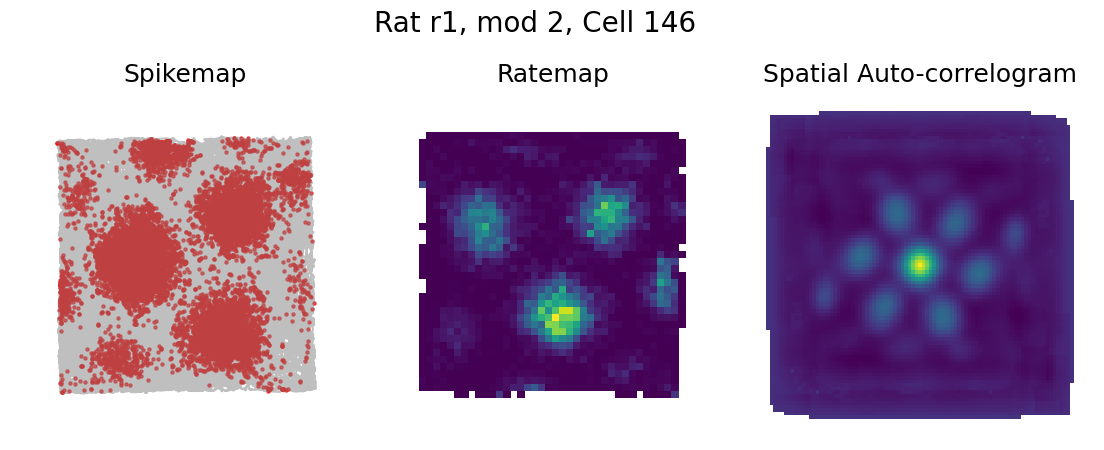

In [33]:
cell = 146

ratemap = G.Scorer.calculate_ratemap(cell = cell)
mask = G.Scorer.get_ring_mask(G.mask_radius, 1)
sac = G.Scorer.calculate_sac(cell)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
# set figure title
fig.suptitle('Rat ' + str(rat) +', mod ' + mod + ', Cell {}'.format(cell), fontsize = 20)
# bring figure closer to title
fig.subplots_adjust(top=1)
# have less space between subplots
fig.subplots_adjust(wspace=0.05)

axes[0].plot( G.x,  G.y, color='grey', alpha=0.5)
axes[0].scatter(G.x[G.spikes[cell] != 0], G.y[G.spikes[cell] != 0], color='red', alpha=0.7, s=5)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].set_title('Spikemap', fontsize = 18)

axes[1].pcolor(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50), ratemap)
axes[1].set_title('Ratemap', fontsize = 18)

masked_sac = np.ma.masked_where(sac == 0, sac)
cmap = matplotlib.colormaps['viridis']
cmap.set_bad(color='white')
axes[2].imshow(masked_sac)

axes[2].set_title('Spatial Auto-correlogram', fontsize = 18)

for ax in axes:
    ax.set_aspect('equal')
    ax.axis('off')

np.float64(0.20202020202020204)

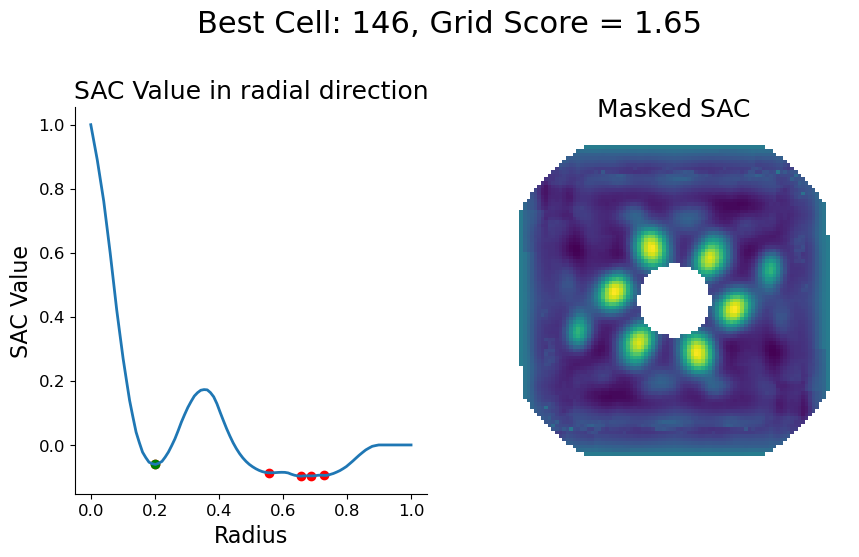

In [34]:
G.get_mask_radius(plot_result=True)

# Figure 0B: Computing the bumps in the SAC

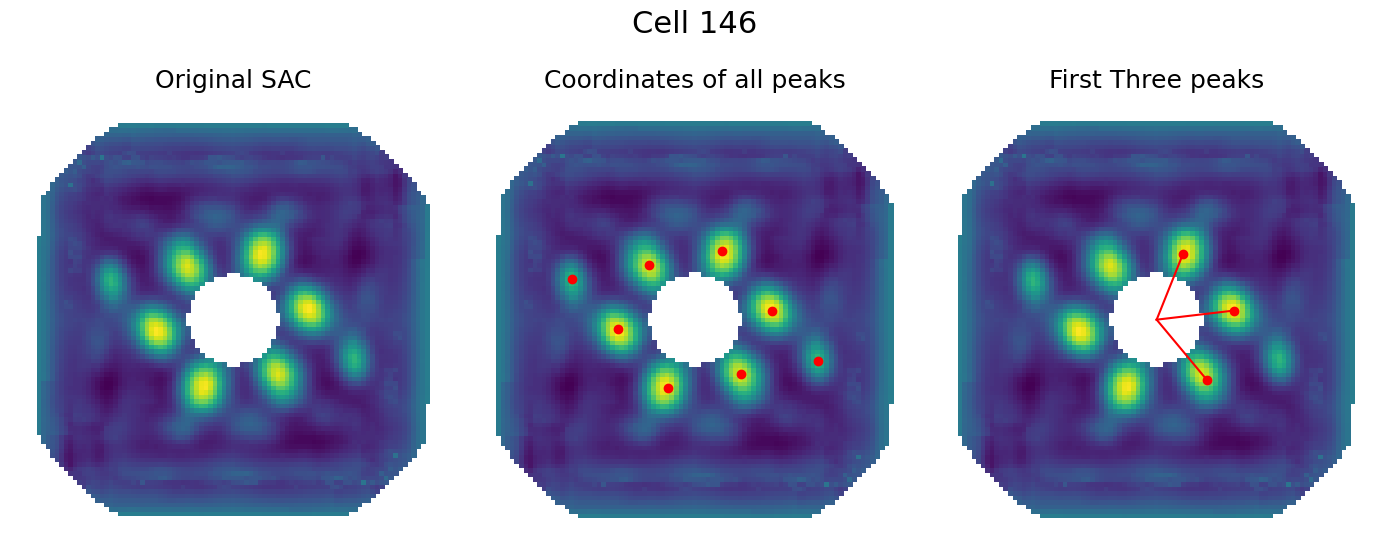

In [27]:
G.show_coordinates_of_peaks(146)

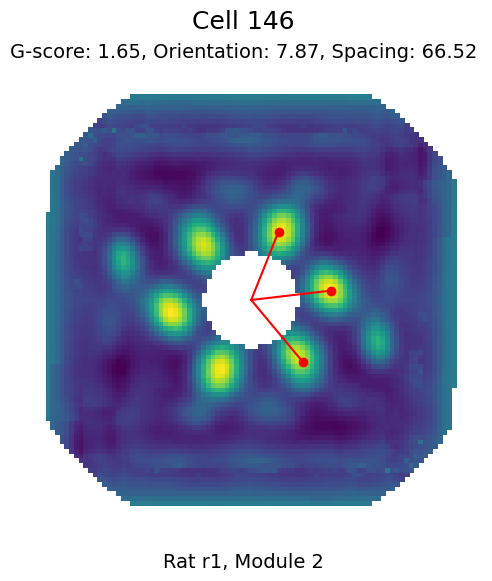

In [35]:
G.show_orientation_and_spacing(146)
# plt.savefig(os.path.join(fig_directory + '/A_method_example.svg'), dpi=1200)

# Figure 0C: Extra considerations

When given the three peaks we also ask for:
1. **Orientations**
    - The minimum difference between every combination of peaks has to be at least 30 degrees 
    - The maximum difference between every combination of peaks has to be at most 180 degrees
2. **Spacing**
    - The ratio of any peak spacing to any other peak can't be lesser than half
    - The ratio of any peak spacing to any other peak can't be greater than double

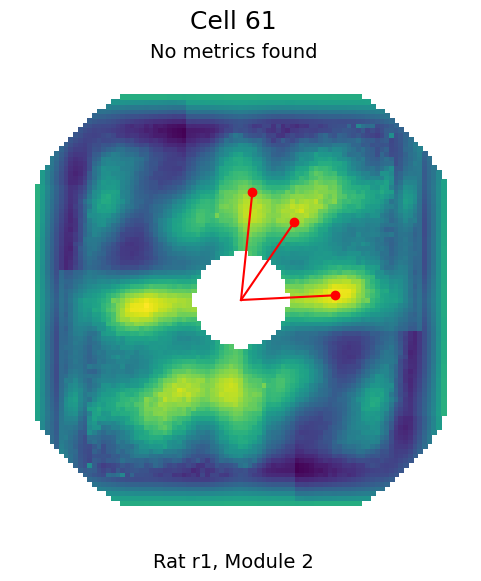

In [29]:
# example where peaks are too close together: cell rejected
G.show_orientation_and_spacing(61)

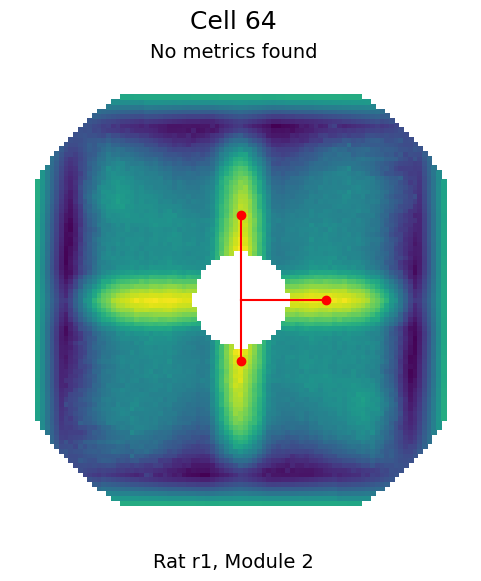

In [30]:
# example where peaks are too far apart: rejected
G.show_orientation_and_spacing(64)

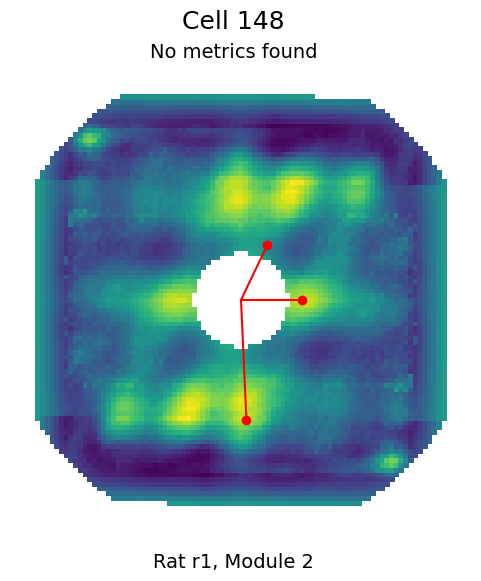

In [36]:
# example of when spacing of one peak is way larger than the other
G.show_orientation_and_spacing(148)

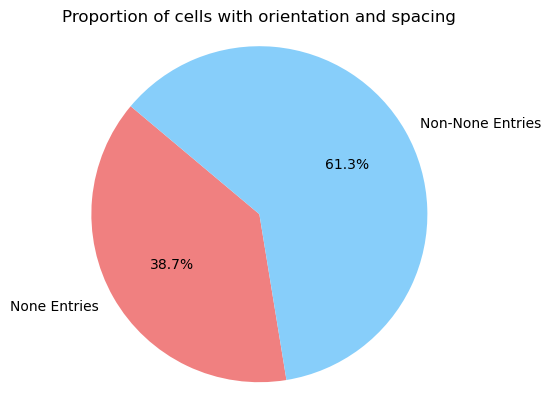

In [37]:
# cells rejected according to these extra criteria

count_none = G.orientation.count(None)
count_non_none = len(G.orientation) - count_none

labels = ['None Entries', 'Non-None Entries']
sizes = [count_none, count_non_none]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of cells with orientation and spacing')
plt.show()